In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [2]:
df.head(12)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [3]:
df.shape

(962, 2)

# Exploring Categories

In [4]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [5]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

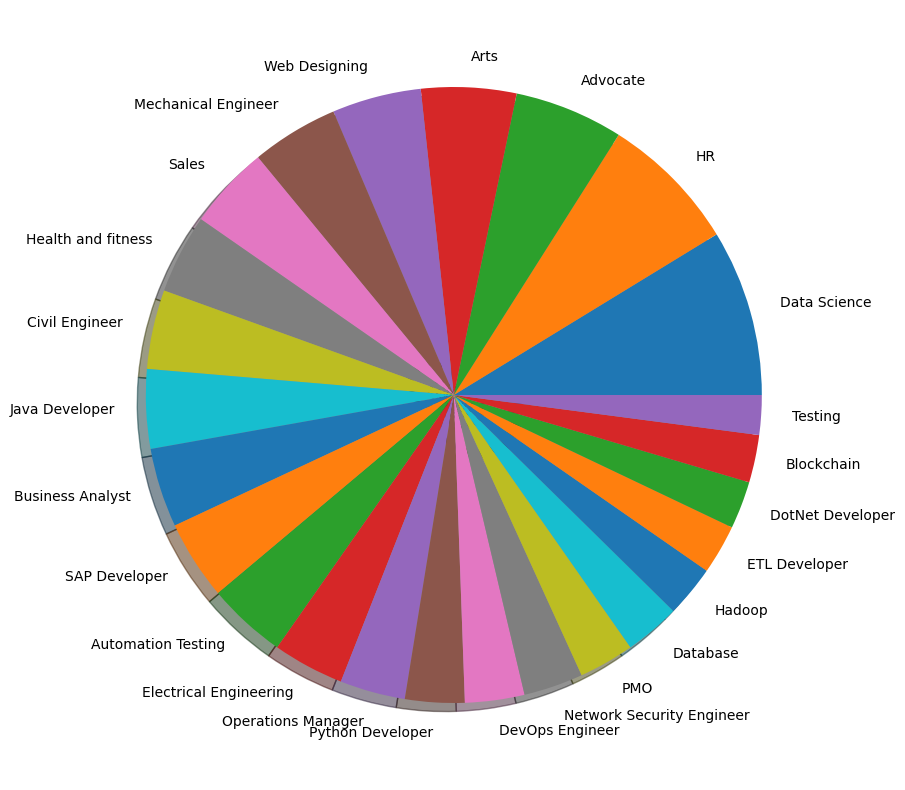

In [6]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,shadow='True')
plt.show()

In [7]:
df['Resume'][0] #resume before cleanisation 

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Now we have to clean data since it contains - URLs,hashtag,mentions,special letters,punctuations


In [8]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [9]:
df['Resume'][0]  # data after cleanisation

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# Now we convert words into categorial values

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [11]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

'Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
'Mechanical Engineer', 'Sales', 'Health and fitness',
'Civil Engineer', 'Java Developer', 'Business Analyst','SAP Developer', 'Automation Testing', 'Electrical Engineering',
'Operations Manager', 'Python Developer', 'DevOps Engineer',
'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'


# Vactorization

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
requiredText  = tfidf.fit_transform(df['Resume'])

# Splitting

In [13]:
requiredText #it shows that requierdText is a sparsh matrix 

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredText,df['Category'], test_size=0.4, random_state=42)

In [15]:
X_train.shape

(577, 7351)

# Now let’s train the model and print the classification report:

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9766233766233766


In [17]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

# now we will pass our resume

In [18]:
myresume = """
Profile
Highly motivated finance student, Proficient in financial and
investment analysis, corporate finance, and financial modeling using
Excel. Skilled in managing academic projects and volunteering events.
Strong analytical, organizational, communication, and time
management skills.
Education
Ashishsinghal573@gmail.com
9760289051
78 west arjun Nagar, Agra
www.linkedin.com/in/
ashish-singhal-99a7801b3
Core Competencies
DOMAIN SKILLS
Financial analysis
Accounting
Excel and financial
modeling
Investment analysis
Personal Skills:
Critical thinking
Attention to detail
Time management
Personal Details
Father Name – SK
AGARWAL
DoB –08.10.2002
Alternate Contact No. –
6397037317
• BBA (Hons) from GLA University, Mathura – 7.8 CPI
• Intermediate (comm) from CBSE Board (2021) -84%
• High School from CBSE Board (2019)-74%
Internship & Project
 Internship:
 Completed forty-five days Internship with PRIYANKA AGARWAL&CO, Agra.
• Analyzed and Developed investment strategies that support our 
client needs.
• Learned to operate automated software for data analysis. 
• Compiled written reports on financial status of the company.
 Project:
Topic – ONLINE BUYING BEHAVIOR OF YOUTH
• Analyzed changes in the buying behavior of youth post Covid
-19.
• Carried out research on different factors affecting the buying
behavior of youth.
• Lead my team on the research project.
 Certification
• Completed “THE ART OF CORPORATE COMMUNICATION:
THE ROAD AHEAD” course from GLA UNIVERSITY
• Completed course on “ENTERPRENEURESHIP” from IIT
MADRAS. Achieved silver medal in it.
• COMPLETED course on “INTERNATINAL BUSINESS” from IIT
MADRAS.
Activities & Achievements
Co-Curricular / Extra – Curricular
• Attended workshop on financial planning.
• Attended workshop on Leadership and team building.
• Attended workshop on Excel for Finance Workshop.
Declaration
• Declared that above mentioned information is true.
"""

In [19]:


# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")#this "unknown" because if our system not able to predict category it will print 
print("Predicted Category:", category_name)

Predicted Category: Arts
